In [3]:
#import libraries

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Masking, Embedding
from keras.regularizers import l2

In [4]:
#load data

#input
input_data = pd.read_csv('/Users/Madi/Desktop/ML/inputdata_randomized5time.csv')
input_data.head()

data1979 = input_data.loc[input_data['year']==1979];data1980 = input_data.loc[input_data['year']==1980];data1981 = input_data.loc[input_data['year']==1981];data1984 = input_data.loc[input_data['year']==1984];data1985 = input_data.loc[input_data['year']==1985];data1986 = input_data.loc[input_data['year']==1986]
data1987 = input_data.loc[input_data['year']==1987];data1988 = input_data.loc[input_data['year']==1988];data1989 = input_data.loc[input_data['year'] == 1989];data1990 = input_data.loc[input_data['year'] == 1990];data1992 = input_data.loc[input_data['year']==1992]
data1993 = input_data.loc[input_data['year']==1993];data1998 = input_data.loc[input_data['year'] == 1998]
data1997 = input_data.loc[input_data['year'] == 1997];data1999 = input_data.loc[input_data['year'] == 1999]; data2000 = input_data.loc[input_data['year'] == 2000]
data2001 = input_data.loc[input_data['year'] == 2001]; data2002 = input_data.loc[input_data['year'] == 2002]
data2003 = input_data.loc[input_data['year'] == 2003]; data2004 = input_data.loc[input_data['year'] == 2004]
data2005 = input_data.loc[input_data['year'] == 2005];data2006 = input_data.loc[input_data['year'] == 2006]
data2007 = input_data.loc[input_data['year'] == 2007];data2008 = input_data.loc[input_data['year'] == 2008]
data2009 = input_data.loc[input_data['year'] == 2009];data2010 = input_data.loc[input_data['year'] == 2010]
data2011 = input_data.loc[input_data['year'] == 2011];data2012 = input_data.loc[input_data['year'] == 2012]
data2013 = input_data.loc[input_data['year'] == 2013];data2014 = input_data.loc[input_data['year'] == 2014]
data2015 = input_data.loc[input_data['year'] == 2015];data2016 = input_data.loc[input_data['year'] == 2016]
data2016 = input_data.loc[input_data['year'] == 2016];data2017 = input_data.loc[input_data['year'] == 2017]
data2018 = input_data.loc[input_data['year'] == 2018];data2019 = input_data.loc[input_data['year'] == 2019]
data2020 = input_data.loc[input_data['year'] == 2020]


a = ['site','airT','precip','snowDepth','SWE','streamFlow']

data1979= data1979[a].copy();data1980= data1980[a].copy();data1981= data1981[a].copy();data1984= data1984[a].copy();data1985= data1985[a].copy();data1987= data1987[a].copy();data1986= data1986[a].copy();data1988 = data1988[a].copy();data1989 = data1989[a].copy();data1990 = data1990[a].copy() ; data1992 = data1992[a].copy();data1993 = data1993[a].copy();data1998 = data1998[a].copy() 
data1997 = data1997[a].copy();data1999 = data1999[a].copy();data2000 = data2000[a].copy();data2001 = data2001[a].copy();data2002 = data2002[a].copy()
data2007 = data2007[a].copy();data2008 = data2008[a].copy();data2009 = data2009[a].copy()
data2010 = data2010[a].copy();data2011 = data2011[a].copy();data2012 = data2012[a].copy()
data2013 = data2013[a].copy();data2014 = data2014[a].copy();data2015 = data2015[a].copy()
data2016 = data2016[a].copy();data2017 = data2017[a].copy();data2018 = data2018[a].copy()
data2019 = data2019[a].copy();data2020 = data2020[a].copy()



In [5]:
#output
output_data = pd.read_csv('/Users/Madi/Desktop/ML/cleandroughtdata1.csv')
out = ["D2Area"]
output_labels = output_data[out].copy()
output_data.head()


,Year,D2Area,Unnamed: 2,Unnamed: 3,Unnamed: 4,arizona area,california,colorado area,area nevada,new mexico,utah,wyoming,total
0,1979,0.004874,NaN,NaN,NaN,113998.0,163696.000000,104185.0,110567.0,121697.000000,84899.0,97914.0,796956.0
1,1980,0.061005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1981,0.017254,NaN,NaN,NaN,1985.0,0.230748,NaN,1979.0,0.004874,NaN,NaN,NaN
3,1984,0.045597,NaN,NaN,NaN,1986.0,0.001083,NaN,1980.0,0.061005,NaN,NaN,NaN
4,1985,0.231000,NaN,NaN,NaN,1987.0,0.027079,NaN,1981.0,0.017254,NaN,NaN,NaN


## Organize data manually into batches

In [6]:

alldata = [data1979,data1980,data1981,data1984,data1985,data1986,data1987,data1988,data1989,data1990,data1992,data1993,data1997,data1998,data1999,data2000,data2001,data2002,data2003,data2004,data2005,data2006,data2007,data2008,data2009,data2010,data2011,data2012,data2013,data2014,data2015,data2016,data2017,data2018,data2019,data2020]

#for x in range(len(alldata)):
 #   print(len(alldata[x])/5)

    
features = 5
batch_size = 1
timestep = 5
count = 0
batch = []
tempbatch = []
tempyear = []
fullbatch = []
tracker = 0
totalcount = 0


for x in range(len(alldata)): 
    tempyear = alldata[tracker]
    batch = []
    index=0
    for y in range((int(tempyear.shape[0]/timestep))):
        if len(batch) < batch_size:
            tempbatch = []
            if y == (int(tempyear.shape[0]/timestep)-1):
                for z in range(timestep):
                    tempbatch.append(tempyear.iloc[index])
                    index +=1
                batch.append(tempbatch)
                totalcount +=1
                fullbatch.append(batch)
            else:
                for z in range(timestep):
                    tempbatch.append(tempyear.iloc[index])
                    index +=1
                batch.append(tempbatch)
                totalcount +=1

        elif len(batch) == batch_size:
            fullbatch.append(batch)
            batch = []
            tempbatch = []
            for z in range(timestep):
                tempbatch.append(tempyear.iloc[index])
                if index == (tempyear.shape[0]-1):
                    batch.append(tempbatch)
                    fullbatch.append(batch)
                    batch = []
                index +=1
   
            batch.append(tempbatch)
            
    tracker +=1


## Add Padding 

In [8]:

#prepadding so batch size is uniform

pad = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0,],[0,0,0,0,0]]

for x in range(len(fullbatch)):
    single = fullbatch[x]
    for m in range(len(single)):
        if len(single) != batch_size:
            difference = batch_size - len(single)
            while difference != 0:
                for k in range(difference):
                    single.insert(0,pad)
                    difference = batch_size - len(single)
         


#convert data back into dataframe
newbatch = []
for x in range(len(fullbatch)):
    single = fullbatch[x]
    for c in range(len(single)):
        individual = single[c]
        for d in range(len(individual)):
            one = individual[d]
            one = pd.DataFrame(one)
            one = pd.DataFrame.transpose(one)

                   

for x in range(len(fullbatch)):
    single = fullbatch[x]
    for c in range(len(single)):
        individual = single[c]
        for d in range(len(individual)):
            one = individual[d]
            if isinstance(one,list) == False:
                one = one.tolist()
                one.pop(0)
                if len(one) != features:
                    while len(one) != features:
                        one.pop(0)
                newbatch.append(one)
            else:
                newbatch.append(one)
                
paddedfinal = pd.DataFrame(newbatch,columns=['airT','precip','snowDepth','SWE','streamFlow'])




In [9]:
## take every 5 so 4 sites are in one vector for one month

temp = []
batches = []
index = 0
paddedfarray = paddedfinal.values.tolist()

padded_flatten = list(itertools.chain(*paddedfarray))


for y in range(int(len(paddedfarray)/batch_size/timestep)):
    for x in range(timestep*batch_size):
        temp.append(paddedfarray[index])
        index +=1
    batches.append(temp)
    temp = []


batch = []
combined = []


for y in range(len(batches)):
    index = 0
    count = 0
    batch = batches[y]
    for z in range(int(len(batch)/batch_size)):
        for x in range(batch_size):
            temp.append(batch[index])
            index +=timestep
        combined.append(temp)
        temp = []
        count+=1
        index = count
        
for x in range(len(combined)):
    combined[x] = list(itertools.chain(*combined[x]))
  
#print(len(combined))

In [10]:
z= features*batch_size

reshapedcombined = np.reshape(combined,(int(len(combined)/timestep),timestep,z))

X_train, X_test, y_train, y_test = train_test_split(reshapedcombined, output_labels, test_size=0.3, random_state=117)


## Normalize Data

In [11]:
#standardize data

x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)
X_train = (X_train - x_mean) / x_std # (train_data - min) / (max-min) 
X_test = (X_test - x_mean) / x_std



In [12]:
print(X_train.shape,'\n',y_train.shape)


(788, 5, 5) 
 (788, 1)


## Build the Model

In [13]:
import sherpa

In [14]:
parameters = [sherpa.Continuous(name='lr', range=[0.0005, 0.001], scale='log'),
sherpa.Ordinal(name='dropout', range=[0,0.1,0.2,0.3, 0.4,0.5]),
    sherpa.Ordinal(name='numnodes',range=[8,16,32,64,128]),
    sherpa.Discrete(name='numlayers',range=[1,8])]


num_trials = 500
alg = sherpa.algorithms.RandomSearch(max_num_trials=num_trials)

study = sherpa.Study(parameters=parameters,
                     algorithm=alg,
                     lower_is_better=True)


INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://209.2.224.182:8880 if on a cluster or
http://localhost:8880 if running locally.
-------------------------------------------------------


 * Serving Flask app 'sherpa.app.app' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [15]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,verbose=True)
 
# Define basic architecture
for trial in study:
    print("Trial {}:\t{}".format(trial.id, trial.parameters))

    model = keras.Sequential()
    for i in range(trial.parameters['numlayers']):
        model.add(keras.layers.LSTM(trial.parameters['numnodes'], return_sequences=True, input_shape = (timestep,features*batch_size)))
        model.add(keras.layers.Dropout(trial.parameters['dropout']))
    model.add(keras.layers.Dense(1))
   

    optimizer = keras.optimizers.Adam(trial.parameters['lr'])
    model.compile(loss='mse',optimizer=optimizer, metrics=['mae'])

    history = model.fit(X_train,y_train,epochs=1000, validation_split=0.2,callbacks=early_stop,verbose=True)
    loss, mae = model.evaluate(X_test,y_test,verbose=0)
    study.add_observation(trial=trial, 
                        objective=mae,
                        context={'loss': loss})
    
    if study.should_trial_stop(trial):
        break
    study.finalize(trial)

    print(study.get_best_result())


    
   
    


Trial 1:	{'lr': 0.0009219662221949606, 'dropout': 0.1, 'numnodes': 32, 'numlayers': 2}


2021-12-20 15:38:20.573995: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-20 15:38:21.280151: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/1000


KeyboardInterrupt: 

In [ ]:
print(study.get_best_result())

In [39]:
sherpabest = pd.read_csv('/Users/Madi/Desktop/ML/sherparesultsb1.csv')
display(sherpabest)

,TrialID,Dropout Rate,Learning Rate,Layers,Nodes,Objective,Loss
0,486,0.2,0.00093,4,128,0.163,0.0452
1,346,0.5,0.00078,4,128,0.168,0.0460
2,291,0.5,0.00087,1,128,0.185,0.0481
3,385,0.4,0.00098,2,16,0.183,0.0482
4,136,0.1,0.00100,2,128,0.183,0.0483
5,357,0.4,0.00096,4,64,0.181,0.0485
6,405,0.5,0.00065,1,16,0.186,0.0487
7,450,0.5,0.00076,2,64,0.183,0.0489
8,463,0.5,0.00064,3,32,0.186,0.0491
9,236,0.3,0.00072,2,128,0.185,0.0494


Epoch 1/1000
20/20 [==============================] - 4s 52ms/step - loss: 2.2053 - mae: 0.3136 - val_loss: 1.8787 - val_mae: 0.2387
Epoch 2/1000
20/20 [==============================] - 0s 17ms/step - loss: 1.8075 - mae: 0.2548 - val_loss: 1.5416 - val_mae: 0.2088
Epoch 3/1000
20/20 [==============================] - 0s 14ms/step - loss: 1.4789 - mae: 0.2196 - val_loss: 1.2773 - val_mae: 0.2115
Epoch 4/1000
20/20 [==============================] - 0s 11ms/step - loss: 1.2266 - mae: 0.2235 - val_loss: 1.0553 - val_mae: 0.2073
Epoch 5/1000
20/20 [==============================] - 0s 11ms/step - loss: 1.0171 - mae: 0.2247 - val_loss: 0.8717 - val_mae: 0.2052
Epoch 6/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.8400 - mae: 0.2200 - val_loss: 0.7193 - val_mae: 0.2035
Epoch 7/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.6936 - mae: 0.2189 - val_loss: 0.5939 - val_mae: 0.2044
Epoch 8/1000
20/20 [==============================] - 0s 11ms/step - 

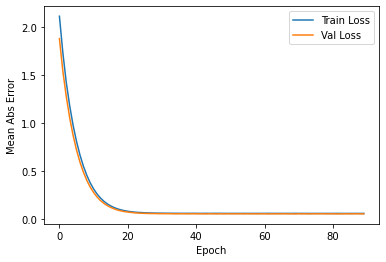

In [266]:
layers = 2
nodes = 128
dropout = 0.5
lr = 0.0003

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,verbose=True)
# We want to use this data to determine how long to train before the model stops making progress.
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val Loss')
    plt.legend() 

model = keras.Sequential()

for i in range(layers):
    model.add(keras.layers.LSTM(nodes, return_sequences=True, input_shape = (timestep,features*batch_size),kernel_regularizer='l2'))
model.add(keras.layers.Dense(1))


optimizer = keras.optimizers.Adam(lr)
model.compile(loss='mse',optimizer=optimizer, metrics=['mae'])

history = model.fit(X_train,y_train,epochs=1000, validation_split=0.2,callbacks=early_stop)
    
model.summary()
plot_history(history)  

In [267]:
X_test.shape


(339, 5, 5)

In [268]:
y_test.shape


(339, 1)

## Evaluate on test data

In [269]:
[loss, mae] = model.evaluate(X_test, y_test, verbose=0)

In [270]:
print(mae)


0.21837052702903748


## Predict using data

In [271]:
test_predictions = model.predict(X_test)

#print(test_predictions)
tempT = []
averages = []
for x in range(len(test_predictions)):
    tempT = test_predictions[x]
    sum = 0
    for y in range(len(tempT)):
        sum = sum + tempT[y]
    avg = sum/len(tempT)
    averages.append(avg)
               
test_predictions = averages


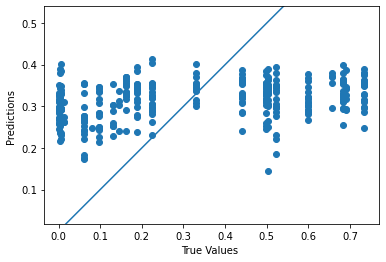

In [275]:


plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])
#plt.savefig('C:/Users/Madi/Desktop/ML/LSTM50.png')
plt.show()

In [276]:
from sklearn.metrics import r2_score
r2_score(y_test,test_predictions)

0.08086424388936786

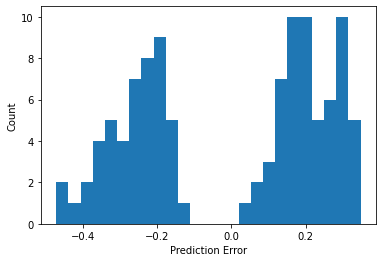

In [277]:

test_predictionsT = np.transpose(test_predictions)
test_predictions = pd.DataFrame(test_predictions,columns=['D2Area'])

error = test_predictions - y_test


plt.hist(error, bins=25)

plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")